## Linear Regression Model Building

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
dataset.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [5]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
import pandas as pd
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df["Price"] = dataset.target

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [13]:
df2 = df.sample(1000)
df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
6294,3.7917,27.0,4.835227,1.082386,2091.0,5.940341,34.01,-117.90,1.311
9746,3.6286,52.0,5.591440,1.159533,836.0,3.252918,36.63,-121.62,1.655
2812,1.7857,41.0,4.847185,1.166220,1005.0,2.694370,35.41,-119.03,0.543
583,5.6194,32.0,6.746594,1.002725,1048.0,2.855586,37.72,-122.08,2.747
15937,4.2672,47.0,4.650794,0.971429,1119.0,3.552381,37.72,-122.40,2.194


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 6294 to 11529
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      1000 non-null   float64
 1   HouseAge    1000 non-null   float64
 2   AveRooms    1000 non-null   float64
 3   AveBedrms   1000 non-null   float64
 4   Population  1000 non-null   float64
 5   AveOccup    1000 non-null   float64
 6   Latitude    1000 non-null   float64
 7   Longitude   1000 non-null   float64
 8   Price       1000 non-null   float64
dtypes: float64(9)
memory usage: 78.1 KB


In [15]:
#now let's start visualizing, all are numerical data

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

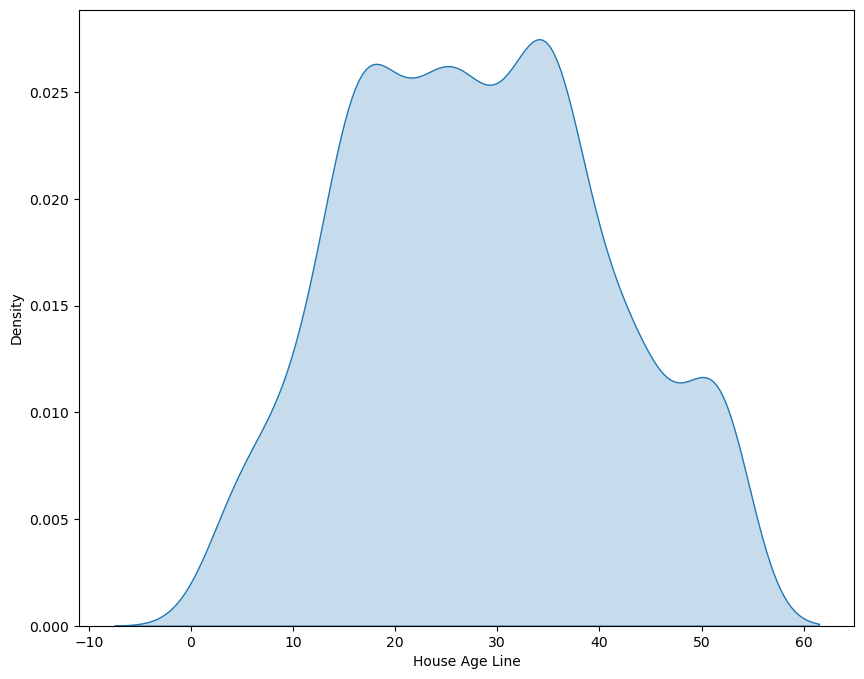

In [17]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df2, x = df2["HouseAge"], shade = True)
plt.xlabel("House Age Line")
plt.ylabel("Density")
plt.show()

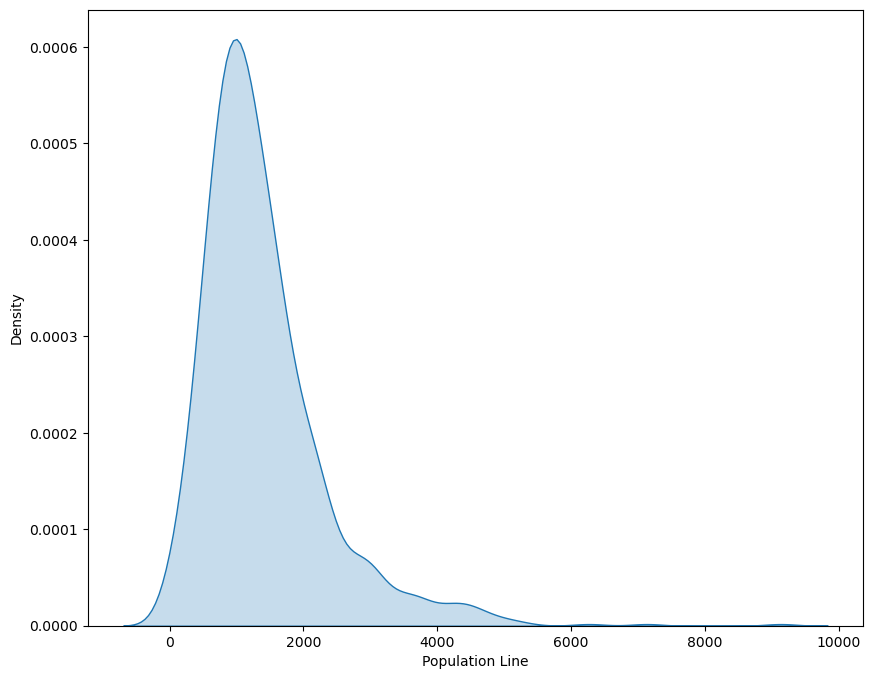

In [18]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df2, x = df2["Population"], shade = True)
plt.xlabel("Population Line")
plt.ylabel("Density")
plt.show()

In [19]:
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [20]:
x = df.iloc[:,:-1]
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
y = df.iloc[:,-1]

In [22]:
## Divide the x and y data into train test split

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state = 51)

In [25]:
x_train.shape, x_test.shape

((17544, 8), (3096, 8))

## Feature Engineering - Standardization

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [27]:
#now fit the scaler to the training set, it will learn the parameters
scaler.fit(x_train)

#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train_scaled

array([[-0.17248464, -0.68618431,  0.16590648, ..., -0.0084947 ,
         0.32421385,  0.11499171],
       [ 2.17348683, -1.0840249 ,  0.55519213, ..., -0.02263842,
        -0.90727897,  0.88053228],
       [-0.72963576, -0.76575242, -0.65664943, ..., -0.03942515,
        -0.64505997,  0.63535916],
       ...,
       [ 0.98986965,  1.06431428,  0.335831  , ..., -0.02965   ,
         0.92825406, -1.4260965 ],
       [-1.04994765,  0.82560993, -0.34998962, ...,  0.09218754,
         0.52556059, -0.10016022],
       [-0.27843072, -1.0840249 , -0.20688102, ...,  0.01276661,
        -1.12267315,  1.11569834]])

In [29]:
pd.DataFrame(x_train_scaled, columns = x_train.columns)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.172485,-0.686184,0.165906,-0.305226,-0.340020,-0.008495,0.324214,0.114992
1,2.173487,-1.084025,0.555192,-0.100117,-0.484797,-0.022638,-0.907279,0.880532
2,-0.729636,-0.765752,-0.656649,0.059026,-0.026045,-0.039425,-0.645060,0.635359
3,0.422140,-1.004457,0.161102,-0.267988,-0.010347,0.007615,0.619210,-1.130888
4,-0.788056,-1.800138,-0.279380,0.115942,0.887969,-0.093941,-0.523315,1.110695
...,...,...,...,...,...,...,...,...
17539,0.663768,0.109497,0.291669,-0.256808,0.531259,-0.019901,1.120236,-0.890718
17540,-0.369430,1.143882,-0.180653,-0.134741,-0.542359,-0.085084,1.082776,-1.386068
17541,0.989870,1.064314,0.335831,-0.143644,-0.631318,-0.029650,0.928254,-1.426097
17542,-1.049948,0.825610,-0.349990,0.098681,0.525154,0.092188,0.525561,-0.100160


## Model Building/Training

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [31]:
lin_reg.fit(x_train_scaled, y_train)

LinearRegression()

In [32]:
y_pred = lin_reg.predict(x_test_scaled)

In [33]:
y_pred

array([1.53183868, 3.26033195, 2.63091753, ..., 0.89096806, 0.75045029,
       2.75879155])

In [34]:
y_test

6428     1.392
8714     3.493
15034    2.228
14083    3.000
6538     1.375
         ...  
2977     0.707
15027    1.493
2937     0.493
10073    1.173
17448    1.422
Name: Price, Length: 3096, dtype: float64

In [35]:
lin_reg.coef_

array([ 0.81842252,  0.1179585 , -0.25228218,  0.29465141, -0.00374107,
       -0.03974801, -0.90162792, -0.86867786])

In [36]:
lin_reg.intercept_

2.0618944938440507

## Calculate MSE, RMSE, MAE

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
import numpy as np

mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test,y_pred)
print(mae)

0.5266844942335684
0.5355758102737179


In [42]:
mse = mean_squared_error(y_pred, y_test)
print(mse)

0.5266844942335684


## Check the accuracy of model with r2 and adjusted r2

In [43]:
from sklearn.metrics import r2_score

In [46]:
score = r2_score(y_test,y_pred)
score

0.6169790964550261

In [47]:
#display adjusted r square
1 - (1-score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.6168305739777658

## Implementing Ridge Optimization

In [48]:
from sklearn.linear_model import Ridge

In [49]:
rid = Ridge(alpha = 2.0)
rid.fit(x_train_scaled, y_train)

Ridge(alpha=2.0)

In [50]:
y_pred_rid = rid.predict(x_test)

In [52]:
r2_score_rid = r2_score(y_test, y_pred_rid)
r2_score_rid

-3771.078609876247